In [3]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.2 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
import shap


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [5]:
data = pd.read_csv('cleandata.csv')
data = data.drop(data.columns[0], axis=1)

important_columns = ['timeknown', 'age', 'education', 'temperature', 'bloodchem4', 'urine', 'psych5', 'blood', 'cost', 'death']

data = data[important_columns]

target_variable = 'death'

encoding_maps = {}

X = data.drop('death', axis=1)
y = data['death']

numerical_columns = X.select_dtypes(include=['int', 'float']).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X[numerical_columns] = X[numerical_columns].fillna(0)



FileNotFoundError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.dtypes

timeknown      float64
age            float64
education      float64
temperature    float64
bloodchem4     float64
urine          float64
psych5         float64
blood          float64
cost           float64
dtype: object

In [ ]:
model = lgb.LGBMClassifier(boosting_type='gbdt')
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3234, number of negative: 1578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1789
[LightGBM] [Info] Number of data points in the train set: 4812, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.672070 -> initscore=0.717562
[LightGBM] [Info] Start training from score 0.717562


LGBMClassifier()

In [ ]:
model1 = lgb.LGBMClassifier(boosting_type='rf', bagging_fraction=0.8, feature_fraction=0.8)
model1.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Number of positive: 3234, number of negative: 1578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1789
[LightGBM] [Info] Number of data points in the train set: 4812, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.672070 -> initscore=0.717562
[LightGBM] [Info] Start training from score 0.717562


LGBMClassifier(bagging_fraction=0.8, boosting_type='rf', feature_fraction=0.8)

In [ ]:
model2 = lgb.LGBMClassifier(boosting_type='dart')
model2.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3234, number of negative: 1578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1789
[LightGBM] [Info] Number of data points in the train set: 4812, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.672070 -> initscore=0.717562
[LightGBM] [Info] Start training from score 0.717562


LGBMClassifier(boosting_type='dart')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred1 = model1.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
norm_conf_matrix = confusion_matrix(y_test,y_pred,normalize='true')

accuracy


0.915282392026578

In [ ]:
accuracy1 = accuracy_score(y_test, y_pred1)
conf_matrix1 = confusion_matrix(y_test, y_pred1)
norm_conf_matrix1 = confusion_matrix(y_test,y_pred1,normalize='true')

accuracy1


0.9086378737541528

In [ ]:
accuracy2 = accuracy_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
norm_conf_matrix2 = confusion_matrix(y_test,y_pred,normalize='true')

accuracy2


0.9127906976744186

<function matplotlib.pyplot.show(close=None, block=None)>

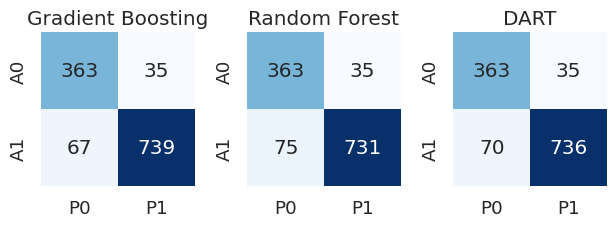

In [ ]:
sns.set(font_scale=1.2)

plt.subplot(1,3,1)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["P0", "P1"],
            yticklabels=["A0", "A1"])

# Add labels and a title

plt.title('Gradient Boosting')

plt.subplot(1,3,2)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["P0", "P1"],
            yticklabels=["A0", "A1"])

# Add labels and a title

plt.title('Random Forest')

plt.subplot(1,3,3)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["P0", "P1"],
            yticklabels=["A0", "A1"])

# Add labels and a title

plt.title('DART')

plt.tight_layout()
plt.show

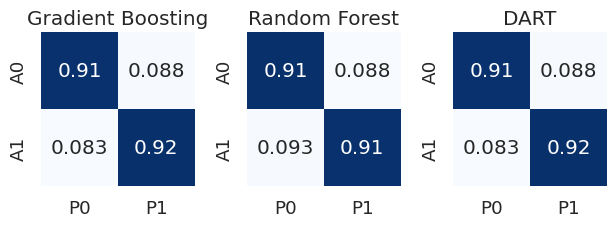

In [ ]:
sns.set(font_scale=1.2)

plt.subplot(1,3,1)

# Create a heatmap of the confusion matrix
sns.heatmap(norm_conf_matrix, annot=True, cmap="Blues", cbar=False, square=True,
            xticklabels=["P0", "P1"],
            yticklabels=["A0", "A1"])


plt.title('Gradient Boosting')

plt.subplot(1,3,2)

# Create a heatmap of the confusion matrix
sns.heatmap(norm_conf_matrix1, annot=True, cmap="Blues", cbar=False, square=True,
            xticklabels=["P0", "P1"],
            yticklabels=["A0", "A1"])


plt.title('Random Forest')

plt.subplot(1,3,3)

# Create a heatmap of the confusion matrix
sns.heatmap(norm_conf_matrix2, annot=True, cmap="Blues", cbar=False, square=True,
            xticklabels=["P0", "P1"],
            yticklabels=["A0", "A1"])


plt.title('DART')

# Display the plot
plt.tight_layout()
plt.show()

In [1]:
#feature importances
lgb.plot_importance(model, height = 0.5, title = "gradient booster")
lgb.plot_importance(model1, height = 0.5, title="random forest")
lgb.plot_importance(model2, height = 0.5, title='DART')

NameError: ignored

In [2]:
explainer_new = shap.Explainer(model, X)
new_shap_values = explainer_new(X)

NameError: ignored

In [ ]:
explainer_new1 = shap.Explainer(model1, X)
new_shap_values1 = explainer_new1(X)

 97%|=================== | 5864/6016 [00:17<00:00]       

In [ ]:
explainer_new2 = shap.Explainer(model2, X)
new_shap_values2 = explainer_new2(X)

 96%|=================== | 5795/6016 [00:24<00:00]       

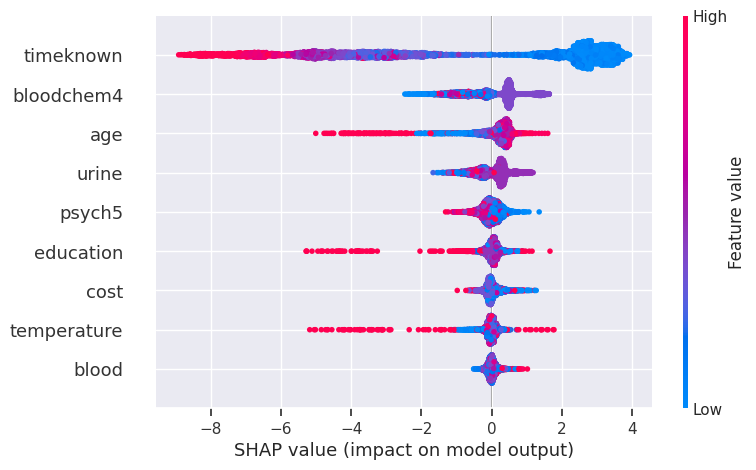

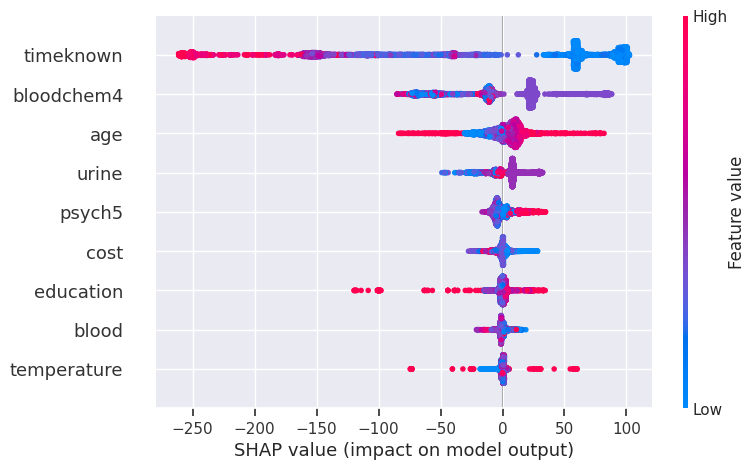

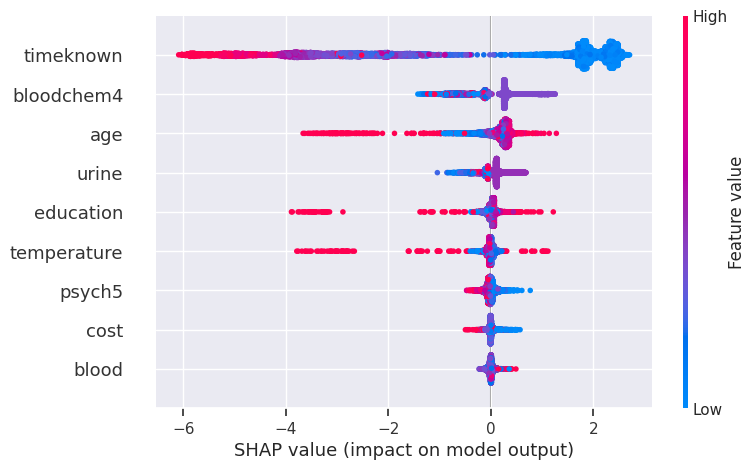

In [ ]:
shap.plots.beeswarm(new_shap_values)
shap.plots.beeswarm(new_shap_values1)
shap.plots.beeswarm(new_shap_values2)

#similar ranged values on each end signifies interaction with other variables

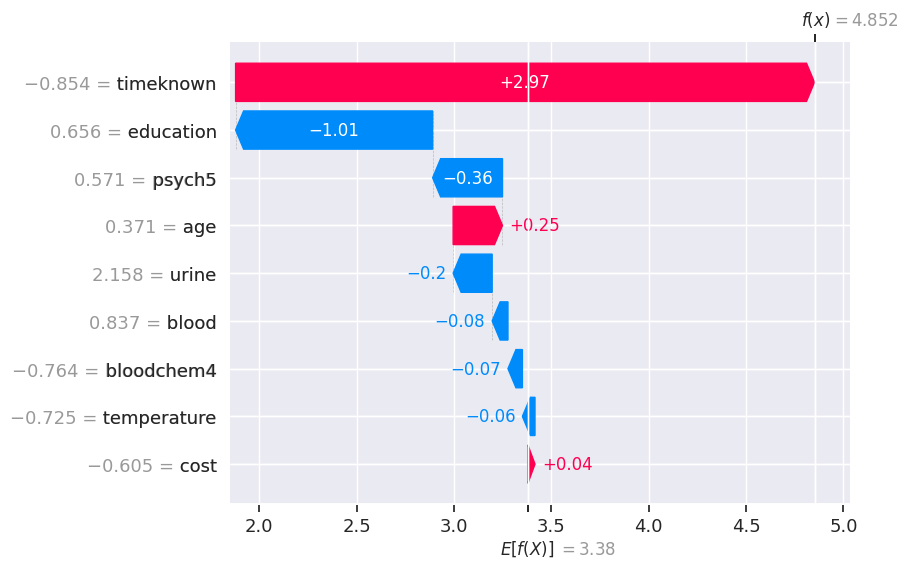

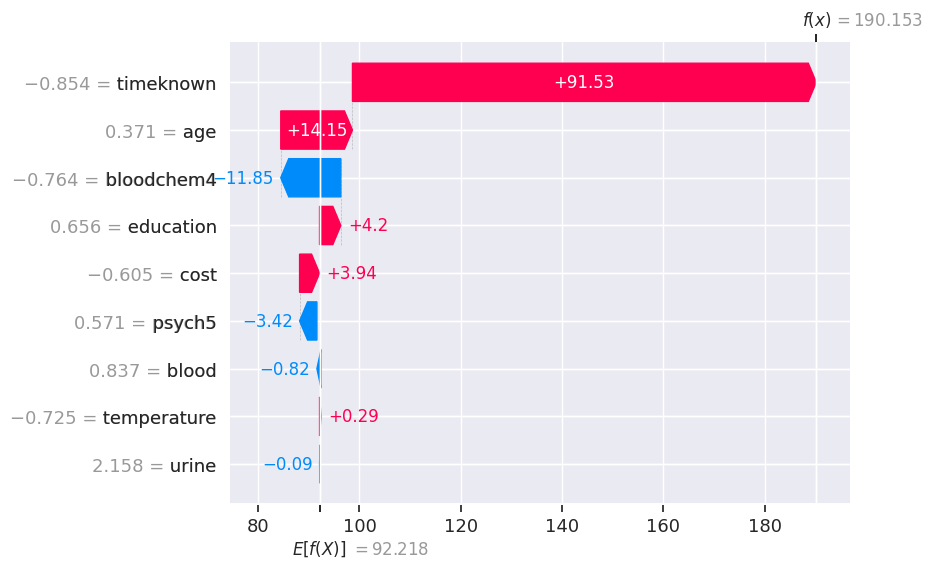

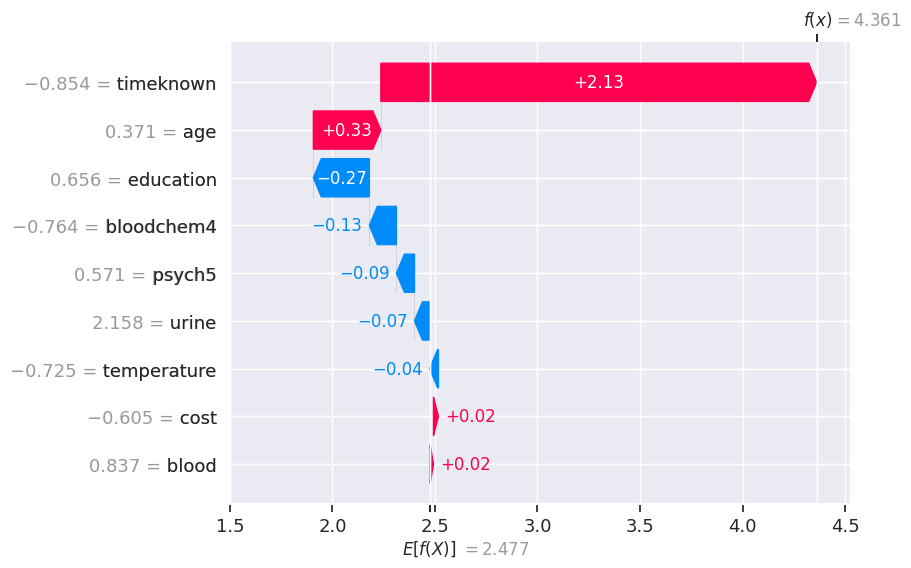

In [ ]:
shap.plots.waterfall(new_shap_values[0])
shap.plots.waterfall(new_shap_values1[0])
shap.plots.waterfall(new_shap_values2[0])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)
roc_auc2 = auc(fpr2, tpr2)


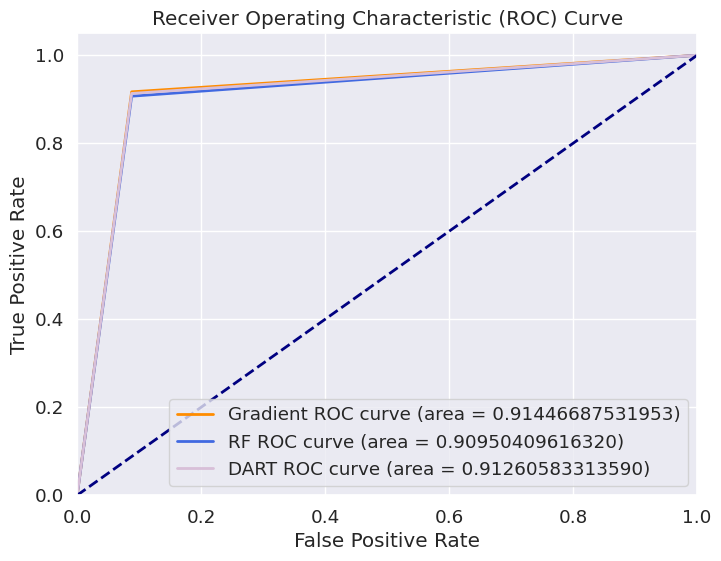

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Gradient ROC curve (area = {:.14f})'.format(roc_auc))
plt.plot(fpr1, tpr1, color='royalblue', lw=2, label='RF ROC curve (area = {:.14f})'.format(roc_auc1))
plt.plot(fpr2, tpr2, color='thistle', lw=2, label='DART ROC curve (area = {:.14f})'.format(roc_auc2))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_pred1)
average_precision1 = average_precision_score(y_test, y_pred1)

precision2, recall2, thresholds2 = precision_recall_curve(y_test, y_pred2)
average_precision2 = average_precision_score(y_test, y_pred2)



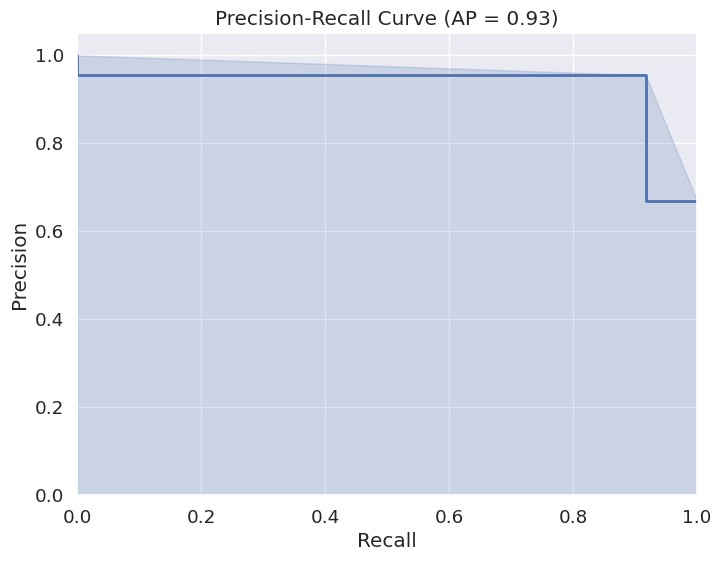

In [ ]:
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', lw=2)
plt.fill_between(recall, precision, alpha=0.2, color='b')



plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Gradient Boosting Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.show()


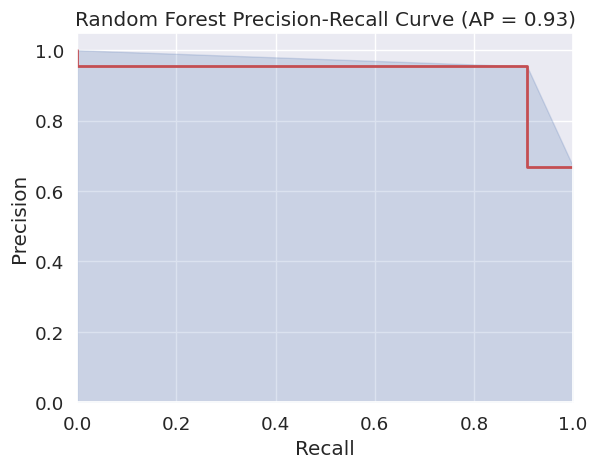

In [ ]:
plt.step(recall1, precision1, color='r', where='post', lw=2)
plt.fill_between(recall1, precision1, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Random Forest Precision-Recall Curve (AP = {:.2f})'.format(average_precision1))
plt.show()


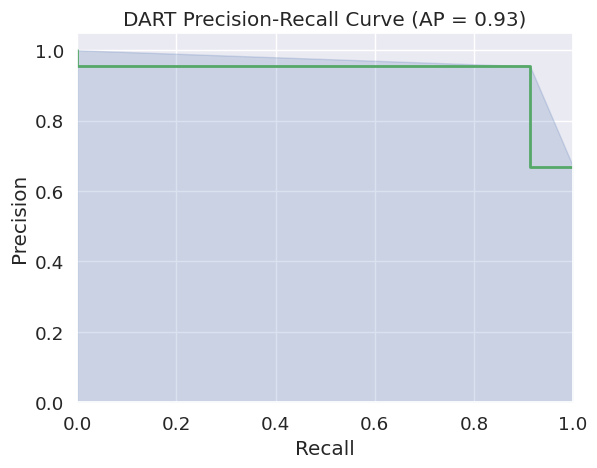

In [ ]:
plt.step(recall2, precision2, color='g', where='post', lw=2)
plt.fill_between(recall2, precision2, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('DART Precision-Recall Curve (AP = {:.2f})'.format(average_precision2))
plt.show()


In [ ]:
#dependence plots

#age, education, temperature, show strong relationship with other variables in set:
# graph against timeknown bloodchem4




===================================================================================================================

In [ ]:
model.booster_.save_model('your_model_file.txt')